In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
# from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [4]:

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
data.data.shape

(569, 30)

In [6]:

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names,data.target.shape

(array(['malignant', 'benign'], dtype='<U9'), (569,))

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X = data.data
y = data.target
X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [7]:

#preprocessing - Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape,X

((569, 30),
 array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
         -1.10454895, -0.31840916],
        [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
         -0.04813821, -0.75120669]]))

In [8]:

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
X_train.size,X_test.size

(15360, 1710)

In [9]:

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.coef_,model.intercept_

(array([[-0.36974876, -0.30795751, -0.35602122, -0.4341002 , -0.12560398,
          0.57903403, -0.81627686, -0.87754314, -0.01749327,  0.30146489,
         -1.31742539,  0.21814011, -0.70812483, -0.99035326, -0.25982912,
          0.5968199 ,  0.09963419, -0.28238129,  0.35936747,  0.69549232,
         -1.00226544, -1.26027355, -0.81937394, -0.96560455, -0.61125115,
          0.05894557, -0.86003361, -0.87997291, -0.83878557, -0.48354596]]),
 array([0.12407897]))

In [14]:

features = list(data.feature_names)
type(features)
#  coefficients of each feature w.r.t values
values = list(zip(features,model.coef_[0]))
values

[('mean radius', -0.36974875550741637),
 ('mean texture', -0.3079575149746524),
 ('mean perimeter', -0.3560212216735793),
 ('mean area', -0.434100201064278),
 ('mean smoothness', -0.1256039801680416),
 ('mean compactness', 0.5790340299468161),
 ('mean concavity', -0.8162768615236883),
 ('mean concave points', -0.8775431355524079),
 ('mean symmetry', -0.017493274054316978),
 ('mean fractal dimension', 0.30146489374291946),
 ('radius error', -1.3174253902746815),
 ('texture error', 0.2181401117403351),
 ('perimeter error', -0.7081248293319464),
 ('area error', -0.990353258471712),
 ('smoothness error', -0.2598291158770301),
 ('compactness error', 0.5968199011995058),
 ('concavity error', 0.09963418650350218),
 ('concave points error', -0.2823812948242982),
 ('symmetry error', 0.3593674678049401),
 ('fractal dimension error', 0.6954923181436011),
 ('worst radius', -1.0022654442293124),
 ('worst texture', -1.2602735465517596),
 ('worst perimeter', -0.8193739365027185),
 ('worst area', -0.9

In [15]:

model.score(X_train,y_train)

0.986328125

In [16]:

model.score(X_test,y_test)

1.0

In [17]:

prediction = model.predict(X_train)
confusion_matrix(y_train,prediction)

array([[185,   5],
       [  2, 320]], dtype=int64)

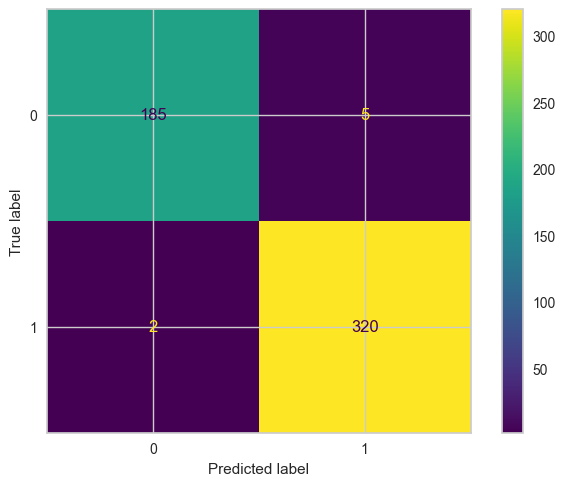

In [18]:
cmatrix = ConfusionMatrixDisplay.from_estimator(model , X_train, y_train)
cmatrix

In [19]:
yHat = model.predict(X_test)
confusion_matrix(y_test,yHat)

array([[22,  0],
       [ 0, 35]], dtype=int64)

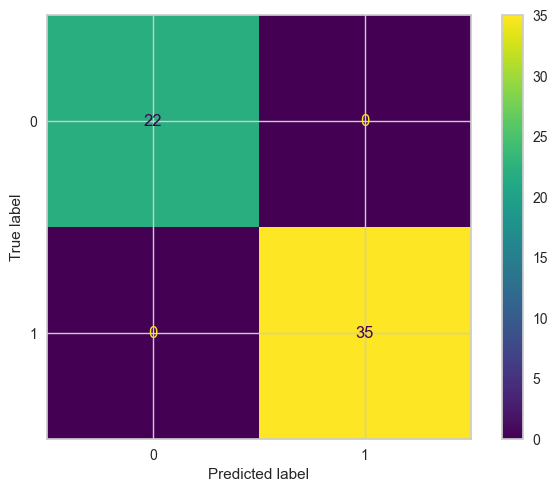

In [20]:
cmatrix_test = ConfusionMatrixDisplay.from_estimator(model , X_test, y_test)
cmatrix_test

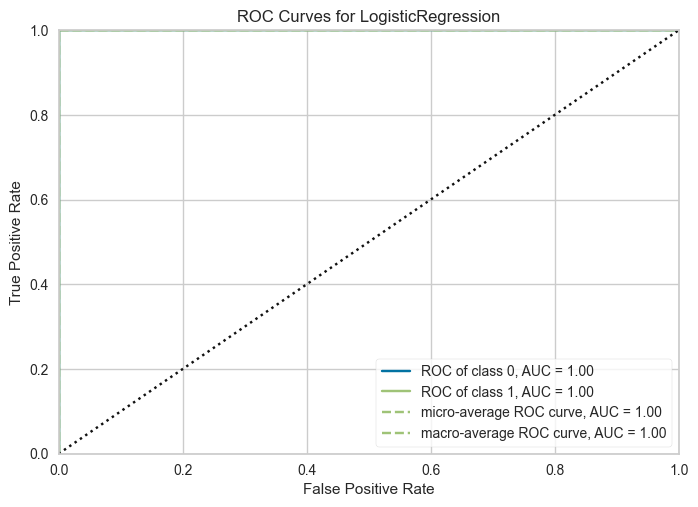

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [21]:
#AUC - Area Under the Curve
curve = ROCAUC(LogisticRegression())
curve.fit(X_train, y_train)
curve.score(X_test, y_test)
curve.show()

In [46]:
curve.show()

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

### 11 B

In [29]:

path = r"code/data/breast-cancer.csv"
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:

data.shape

(568, 32)

In [27]:
data.columns

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [30]:

data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [31]:

data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [32]:
#preprocessing
enc = LabelEncoder()
data['diagnosis'] = enc.fit_transform(data['diagnosis'])

In [33]:

X = data.drop(columns=['diagnosis'],axis = 1)
y = data['diagnosis']

In [34]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [35]:
#scaling 
min_max = MinMaxScaler()
#model building
lr = LogisticRegression()
pipe = Pipeline([
                ('scalar', min_max),
                ('lr', lr)
                ])

In [36]:

#Fitting the model and perform hyperparameter tuning using GridSearchCV with the pipeline
param_grid = dict(lr__C=[0.1, 1, 10])
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [37]:
#Training Score - Bias
model.score(X_train,y_train)

0.978515625

In [38]:

#Testing Score - Variance
model.score(X_test,y_test)

1.0

In [39]:
model.best_params_

{'lr__C': 10}

In [40]:

prediction = model.predict(X_train)
confusion_matrix(y_train,prediction)

array([[321,   2],
       [  9, 180]], dtype=int64)

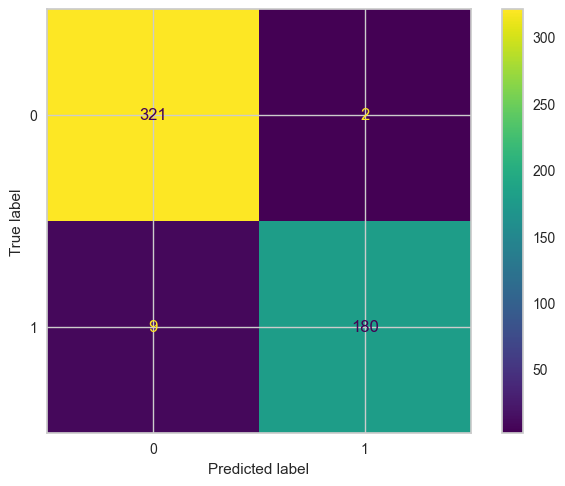

In [41]:
cmatrix = ConfusionMatrixDisplay.from_estimator(model , X_train, y_train)
cmatrix

In [42]:

yHat = model.predict(X_test)
confusion_matrix(y_test,yHat)

array([[34,  0],
       [ 0, 23]], dtype=int64)

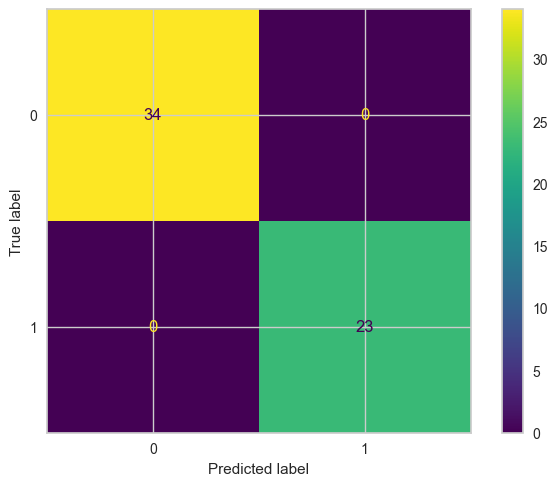

In [43]:

cmatrix_test = ConfusionMatrixDisplay.from_estimator(model , X_test, y_test)
cmatrix_test

In [44]:

best_model = model.best_estimator_.named_steps['lr']
best_model.coef_

array([[ 0.36183511,  2.36990875,  3.12490253,  2.27266035,  2.30170721,
         1.05940678, -1.22670093,  2.77017626,  3.58147647,  0.5167807 ,
        -1.73460087,  4.87215866,  0.00533128,  3.49492357,  2.75048012,
         0.59635701, -3.33921289, -0.66095291,  0.93088318, -1.06933836,
        -1.8915877 ,  4.83305344,  4.55122948,  4.07551581,  3.7121846 ,
         2.85823948,  0.33884695,  2.87673793,  4.34280939,  3.46824671,
         0.98924722]])

In [45]:

features = list(data.columns)
type(features)
#  coefficients of each feature w.r.t values
values = list(zip(features,best_model.coef_[0]))
values

[('id', 0.36183510737301783),
 ('diagnosis', 2.369908746504568),
 ('radius_mean', 3.1249025325080138),
 ('texture_mean', 2.2726603526521663),
 ('perimeter_mean', 2.3017072123607987),
 ('area_mean', 1.0594067806908785),
 ('smoothness_mean', -1.226700925304295),
 ('compactness_mean', 2.77017626459631),
 ('concavity_mean', 3.5814764687253633),
 ('concave points_mean', 0.5167807000101559),
 ('symmetry_mean', -1.7346008715186811),
 ('fractal_dimension_mean', 4.872158663741361),
 ('radius_se', 0.005331281421363679),
 ('texture_se', 3.4949235678136468),
 ('perimeter_se', 2.7504801193810224),
 ('area_se', 0.596357009156368),
 ('smoothness_se', -3.3392128886684156),
 ('compactness_se', -0.6609529064902673),
 ('concavity_se', 0.9308831794403517),
 ('concave points_se', -1.0693383556226164),
 ('symmetry_se', -1.8915877028756798),
 ('fractal_dimension_se', 4.833053444548936),
 ('radius_worst', 4.551229482528555),
 ('texture_worst', 4.075515809897735),
 ('perimeter_worst', 3.7121846036292117),
 ('a